In [95]:
import pandas as pd
from sklearn.model_selection import KFold,StratifiedKFold
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pygad
from sklearn.tree import DecisionTreeClassifier

In [71]:
# read data
df = pd.read_csv('spambase.csv')

In [72]:
X = df.drop(columns=['spam'])
y = df['spam']

In [73]:
# Create subsamples
fold_indexes = []
kf = StratifiedKFold(n_splits=46, random_state=None, shuffle=True)
for i, (train_index, test_index) in enumerate(kf.split(X,y)):
    fold_indexes.append(test_index)

In [74]:
print(len(fold_indexes[1]))

100


In [83]:
#Define the function to optimize (in this case, a simple binary problem)
X_temp = X.loc[fold_indexes[1]].to_numpy()
y_temp = y.loc[fold_indexes[1]].to_numpy()

model =  xgb.XGBClassifier()

print(len(X_temp))
print(len(y_temp))

def loss(new_feature,sol_idx):
    X = np.hstack((X_temp,np.array([new_feature]).T))
    model.fit(X,y_temp)
    scores = cross_val_score(model, X, y_temp, cv=10, scoring='f1')
    return np.mean(scores)

100
100


In [90]:
# GA
fitness_function = loss

num_generations = 100
num_parents_mating = 4

sol_per_pop = 30
num_genes = len(y_temp)

init_range_low = 0
init_range_high = 2

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [91]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       gene_type=int)

In [92]:
ga_instance.run()

In [93]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
Fitness value of the best solution = 0.9155844155844155


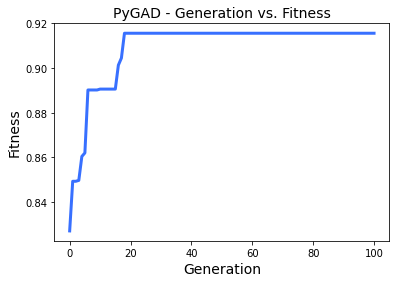

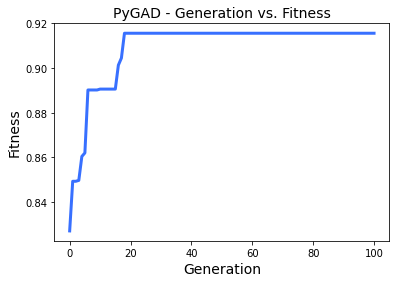

In [94]:
ga_instance.plot_fitness()

In [112]:
feature = DecisionTreeClassifier(max_depth=3)
feature.fit(X_temp,solution)

DecisionTreeClassifier(max_depth=3)

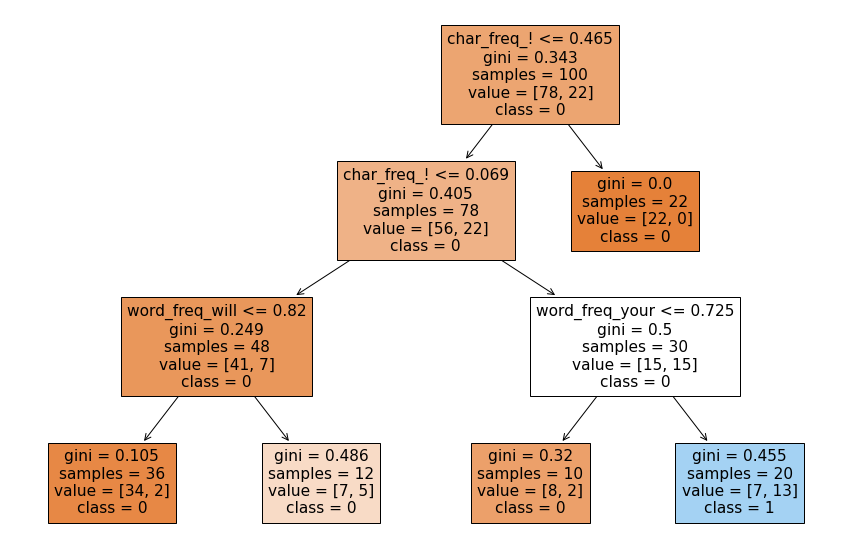

In [115]:
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
dot_data = tree.plot_tree(feature, 
                                feature_names=list(df.columns[:-1]),
                                class_names=['0','1'],
                                filled=True)

In [118]:
# Add feature 
new_f = feature.predict(X.to_numpy())

In [126]:
X = X.drop(columns='f1')

In [127]:
new_X = X.copy()

In [128]:
new_X['f1'] = new_f

In [129]:
model1 =  xgb.XGBClassifier()
scores = cross_val_score(model1, X.to_numpy(), y.to_numpy(), cv=10, scoring='f1')
print(f'{np.mean(scores)} +- {np.std(scores)}')

0.9291562963145171 +- 0.03477263386789324


In [130]:
model2 =  xgb.XGBClassifier()
scores = cross_val_score(model2, new_X.to_numpy(), y.to_numpy(), cv=10, scoring='f1')
print(f'{np.mean(scores)} +- {np.std(scores)}')

0.9259391321958054 +- 0.032368209421196496


In [125]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,f1
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,0
